## Food-Recys-KoAlpaca-QLoRA-Model

- Apply QLoRA Fine-Tuning to the KoAlpaca-Polyglot-ko 5.8B model

- Reference :
  - https://colab.research.google.com/gist/Beomi/f163a6c04a869d18ee1a025b6d33e6d8/2023_05_26_bnb_4bit_koalpaca_v1_1a_on_polyglot_ko_12_8b.ipynb

### Í∏∞Î≥∏ ÏÑ§Ïπò
- huggingface
  - bitsandbytes
  - transfomers
  - peft
  - accelerate
  - datasets

In [1]:
!nvidia-smi

Sat Dec  9 05:19:22 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install -q -U bitsandbytes
!pip install -q -U git+https://github.com/huggingface/transformers.git
!pip install -q -U git+https://github.com/huggingface/peft.git
!pip install -q -U git+https://github.com/huggingface/accelerate.git
!pip install -q datasets

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 92.6/92.6 MB 8.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 265.7/265.7 kB 5.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 521.2/521.2 kB 6.5 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

### Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú

- Fine-TuningÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ÏÖã
- self-instructÎ•º Ïù¥Ïö©Ìï¥ ÏñªÏùÄ jsonl ÌååÏùº ÏóÖÎ°úÎìú(machine_generated_instructions.jsonl)

In [3]:
from datasets import load_dataset

# Dataset Load
data = load_dataset("kyeong6/food_recys")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [4]:
data

DatasetDict({
    train: Dataset({
        features: ['instruction', 'input', 'output'],
        num_rows: 10031
    })
})

### Îç∞Ïù¥ÌÑ∞ Îß§Ìïë

- Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Ï±óÎ¥áÏóê ÌïôÏäµÏãúÌÇ§Í∏∞ ÏúÑÌïú Îß§Ìïë ÏûëÏóÖ

In [5]:
data = data.map(
    lambda x: {'text': f"### ÏßàÎ¨∏: {x['instruction']}\n\n### ÎãµÎ≥Ä: {x['output']}<|endoftext|>" }
)

Map:   0%|          | 0/10031 [00:00<?, ? examples/s]

### ÎÇòÎàÑÏñ¥ÏßÑ Î™®Îç∏ Î°úÎìú

- ÌååÏùºÏùÑ ÏûëÍ≤å ÎÇòÎàÑÏñ¥ Î°úÎìúÌïú Î†àÌè¨Î•º ÏÇ¨Ïö©ÌïòÎ©¥ RAM Ïò§Î•òÏóÜÏù¥ ÏÇ¨Ïö© Í∞ÄÎä•

In [6]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

model_id = "beomi/KoAlpaca-Polyglot-5.8B"
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(model_id, quantization_config=bnb_config, device_map={"":0})

tokenizer_config.json:   0%|          | 0.00/210 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/185 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/663 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/36.8k [00:00<?, ?B/s]

model-00001-of-00013.safetensors:   0%|          | 0.00/926M [00:00<?, ?B/s]

model-00002-of-00013.safetensors:   0%|          | 0.00/952M [00:00<?, ?B/s]

model-00003-of-00013.safetensors:   0%|          | 0.00/948M [00:00<?, ?B/s]

model-00004-of-00013.safetensors:   0%|          | 0.00/948M [00:00<?, ?B/s]

model-00005-of-00013.safetensors:   0%|          | 0.00/952M [00:00<?, ?B/s]

model-00006-of-00013.safetensors:   0%|          | 0.00/948M [00:00<?, ?B/s]

model-00007-of-00013.safetensors:   0%|          | 0.00/948M [00:00<?, ?B/s]

model-00008-of-00013.safetensors:   0%|          | 0.00/952M [00:00<?, ?B/s]

model-00009-of-00013.safetensors:   0%|          | 0.00/948M [00:00<?, ?B/s]

model-00010-of-00013.safetensors:   0%|          | 0.00/948M [00:00<?, ?B/s]

model-00011-of-00013.safetensors:   0%|          | 0.00/952M [00:00<?, ?B/s]

model-00012-of-00013.safetensors:   0%|          | 0.00/948M [00:00<?, ?B/s]

model-00013-of-00013.safetensors:   0%|          | 0.00/515M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/13 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

### ÌÜ†ÌÅ∞Ìôî

- ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Îßå ÌÜ†ÌÅ∞Ìôî ÏûëÏóÖ ÏàòÌñâ

In [7]:
data = data.map(lambda samples: tokenizer(samples["text"]), batched=True)

Map:   0%|          | 0/10031 [00:00<?, ? examples/s]

In [8]:
data['train'][0]['text']

'### ÏßàÎ¨∏: ÏùºÏãù Ï§ëÏóêÏÑúÎèÑ Ïú†Î™ÖÌïú ÏùåÏãùÏùÄ Î¨¥ÏóáÏù∏Í∞ÄÏöî?\n\n### ÎãµÎ≥Ä: ÏùºÏãù Ï§ëÏóêÏÑú Ïú†Î™ÖÌïú ÏùåÏãùÏúºÎ°úÎäî Ï¥àÎ∞•, ÎùºÎ©ò, ÎèàÍπåÏä§, Ïö∞Îèô Îì±Ïù¥ ÏûàÏäµÎãàÎã§.<|endoftext|>'

### PEFT ÏàòÌñâ

- PEFTÎ•º ÌÜµÌï¥ prepare_model_for_kbit_trainingÎ°ú Low bit ÌïôÏäµÏùÑ Ï§ÄÎπÑ

In [9]:
from peft import prepare_model_for_kbit_training

model.gradient_checkpointing_enable()
model = prepare_model_for_kbit_training(model)

- Í∏∞Ï°¥ Î™®Îç∏ Ï§ë ÌïôÏäµÍ∞ÄÎä•Ìïú ÌååÎùºÎØ∏ÌÑ∞Ïùò Ïàò Ï∂úÎ†•ÌïòÎäî Ìï®Ïàò

In [10]:
def print_trainable_parameters(model):
    """
    Prints the number of trainable parameters in the model.
    """
    trainable_params = 0
    all_param = 0
    for _, param in model.named_parameters():
        all_param += param.numel()
        if param.requires_grad:
            trainable_params += param.numel()
    print(
        f"trainable params: {trainable_params} || all params: {all_param} || trainable%: {100 * trainable_params / all_param}"
    )

### LoRA Parameter Ï†ïÏùò

In [11]:
from peft import LoraConfig, get_peft_model

config = LoraConfig(
    r=8,
    lora_alpha=32,
    target_modules=["query_key_value"],
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM"
)

model = get_peft_model(model, config)
print_trainable_parameters(model)

trainable params: 3670016 || all params: 3070156800 || trainable%: 0.11953838970048696


### ÌïôÏäµ

- optim ÌååÎùºÎØ∏ÌÑ∞Ïùò Í∞íÏù∏ paged_adamw_8bit Î∞©ÏãùÏùÄ train lossÎ•º 0ÏúºÎ°ú ÎßåÎìúÎäî Ïò§Î•ò Î∞úÏÉùÏãúÏºú Ï£ºÏÑù Ï≤òÎ¶¨

In [12]:
import transformers

# needed for gpt-neo-x tokenizer
tokenizer.pad_token = tokenizer.eos_token

trainer = transformers.Trainer(
    model=model,
    train_dataset=data["train"],
    args=transformers.TrainingArguments(
        per_device_train_batch_size=8,
        gradient_accumulation_steps=1,
        max_steps=6000,
        learning_rate=1e-4,
        fp16=True,
        logging_steps=10,
        logging_dir="./logs",
        output_dir="outputs",
        # optim="paged_adamw_8bit"
    ),
    data_collator=transformers.DataCollatorForLanguageModeling(tokenizer, mlm=False),
)
model.config.use_cache = False  # silence the warnings. Please re-enable for inference!
trainer.train()

You're using a PreTrainedTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.

TrainOutput(global_step=6000, training_loss=1.348427028020223, metrics={'train_runtime': 19157.7494, 'train_samples_per_second': 2.506, 'train_steps_per_second': 0.313, 'total_flos': 1.918569496854528e+17, 'train_loss': 1.348427028020223, 'epoch': 4.78})

In [13]:
model.eval()
model.config.use_cache = True  # silence the warnings. Please re-enable for inference!

### Î™®Îç∏ ÎãµÎ≥Ä ÌôïÏù∏

- ÌïôÏäµÌïú Î™®Îç∏Ïù¥ ÏÉùÏÑ±Ìïú ÎãµÎ≥Ä ÌôïÏù∏

In [14]:
model.generate(**tokenizer("### ÏßàÎ¨∏: Ï†ÄÎÖÅ ÏãùÏÇ¨ Ï∂îÏ≤úÌï¥Ï§ò", return_tensors='pt', return_token_type_ids=False))

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1518: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1355: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1636: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `

tensor([[   6,    6,    6, 2438,   29, 3522, 4163, 3046,  310, 3219,  202,  202,
            6,    6,    6, 4253,   29, 3522, 4163,  286]])

- Î™®Îç∏Ïùò ÎãµÎ≥ÄÏùÑ Î∞õÏïÑÏôÄ ÌÜ†ÌÅ∞ÏùÄ Ìï¥ÎèÖÌïòÎäî Ìï®Ïàò

In [15]:
def gen(x):
    gened = model.generate(
        **tokenizer(
            f"### ÏßàÎ¨∏: {x}\n\n### ÎãµÎ≥Ä:",
            return_tensors='pt',
            return_token_type_ids=False
        ),
        max_new_tokens=256,
        early_stopping=True,
        do_sample=True,
        eos_token_id=2,
    )
    print(tokenizer.decode(gened[0]).split('###')[2])

- Îã§ÏñëÌïú ÎãµÎ≥Ä ÌôïÏù∏

In [16]:
gen('ÎÇ†Ïî®Í∞Ä ÎçîÏõåÏÑú ÏãúÏõêÌïú ÏùåÏãù Î®πÍ≥† Ïã∂ÏùÄÎç∞ Ï∂îÏ≤úÌï¥Ï§ò')

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


 ÎãµÎ≥Ä: Î¨ºÎÉâÎ©¥Ïù¥ÎÇò ÏΩ©Íµ≠ÏàòÎ•º Ï∂îÏ≤úÎìúÎ¶ΩÎãàÎã§. ÎÉâÎ©¥Ïù¥ÎÇò ÏΩ©Íµ≠ÏàòÎäî ÏãúÏõêÌïòÎ©¥ÏÑúÎèÑ ÎßõÏûàÎäî ÏùåÏãùÏúºÎ°ú, ÎçîÏö¥ ÎÇ†Ïî®Ïóê ÏãúÏõêÌïú ÏùåÏãùÏùÑ Ï¶êÍ∏∏ Ïàò ÏûàÏäµÎãàÎã§. Ï∞¨ ÏùåÏãùÏù¥ÎùºÎäî Ï†êÏóê Ïú†ÏùòÌïòÏÖîÏïº Ìï©ÎãàÎã§. ÎÇ†Ïî®Í∞Ä ÎçîÏõåÏÑú Îç•Í≥† ÏãúÏõêÌïú ÏùåÏãùÏù¥ ÌïÑÏöîÌïòÏãúÎã§Î©¥, Î¨ºÎÉâÎ©¥Ïù¥ÎÇò ÏΩ©Íµ≠ÏàòÎ•º Ï¶êÍ≤®Î≥¥ÏÑ∏Ïöî! ÎçîÏö¥ ÎÇ†Ïî®ÏóêÎèÑ ÎçîÏúÑÎ•º ÎÇ†Î†§Ï§Ñ Í≤ÉÏûÖÎãàÎã§.




In [17]:
gen('Ïò§Îäò Ïó¨ÏûêÏπúÍµ¨ÏôÄ Îç∞Ïù¥Ìä∏ÌïòÎ†§Í≥† ÌïòÎäîÎç∞ Í∞ôÏù¥ Î®πÏùÑ ÏùåÏãù Ï∂îÏ≤úÌï¥Ï£ºÎùº')

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


 ÎãµÎ≥Ä: Ïò§Îäò Îç∞Ïù¥Ìä∏ÏóêÎäî ÌîºÏûêÎ•º Ï∂îÏ≤úÎìúÎ¶ΩÎãàÎã§. ÌîºÏûêÎäî Îã§ÏñëÌïú ÌÜ†ÌïëÍ≥º ÎßõÏúºÎ°ú Ï¶êÍ∏∏ Ïàò ÏûàÎäî ÎåÄÏ§ëÏ†ÅÏù∏ ÏùåÏãù Ï§ë ÌïòÎÇòÎ°ú, Ïó¨ÏûêÏπúÍµ¨ÏôÄ ÌäπÎ≥ÑÌïú Í≤ΩÌóòÏùÑ ÏñªÏùÑ Ïàò ÏûàÏäµÎãàÎã§. ÌîºÏûêÎäî Î∞îÏÇ≠Ìïú ÎèÑÏö∞ ÏúÑÏóê Îã§ÏñëÌïú ÌÜ†ÌïëÍ≥º ÏπòÏ¶àÎ•º Ïò¨Î†§ Íµ¨ÏõåÎÇ¥Îäî ÏùåÏãùÏúºÎ°ú, Îã§ÏñëÌïú Ï¢ÖÎ•òÏùò ÌîºÏûêÎ•º Ï¶êÍ∏∏ Ïàò ÏûàÏúºÎ©∞, Îã§ÏñëÌïú ÎßõÍ≥º ÌíçÎØ∏Î•º Ï¶êÍ∏∏ Ïàò ÏûàÏäµÎãàÎã§. ÌîºÏûêÎäî Ïó¨ÏûêÏπúÍµ¨ÏôÄÏùò Îç∞Ïù¥Ìä∏ Ïãú Í∞ôÏù¥ Ï¶êÍ∏∞Í∏∞ Ï¢ãÏùÄ ÏùåÏãùÏù¥Îùº Ï∂îÏ≤úÎìúÎ¶¥Í≤åÏöî. ÎßõÏûàÍ≤å Ï¶êÍ≤®Î≥¥ÏÑ∏Ïöî! 
=> ÌîºÏûêÎäî ÌîºÏûêÌÜ†ÌïëÏóê Îî∞Îùº Îã§ÏñëÌïú ÎßõÏùÑ Ï¶êÍ∏∏ Ïàò ÏûàÏäµÎãàÎã§. ÌîºÏûê ÏúÑÏóêÎäî ÏñáÏùÄ ÌÜ†ÎßàÌÜ† ÏÜåÏä§, Îã§ÏñëÌïú ÏπòÏ¶à, Î≤ÑÏÑØ, Í≥†Í∏∞ Îì± Îã§ÏñëÌïú ÌÜ†ÌïëÏùÑ ÏñπÏñ¥ÏÑú ÎßõÏùÑ ÎçîÌï† Ïàò ÏûàÏäµÎãàÎã§. ÎòêÌïú, ÌÜ†ÌïëÏùÄ ÏÑ†ÌÉù ÏÇ¨Ìï≠Ïù¥ÎØÄÎ°ú ÏûêÏú†Î°≠Í≤å ÏÑ†ÌÉùÌï† Ïàò ÏûàÏäµÎãàÎã§. ÌîºÏûêÎäî Ïó¨ÏûêÏπúÍµ¨ÏôÄÏùò ÌäπÎ≥ÑÌïú ÎÇ†Ïóê Ìï®Íªò Ï¶êÍ∏∏ Ïàò ÏûàÎäî ÏùåÏãùÏúºÎ°ú Ï∂îÏ≤úÎìúÎ¶ΩÎãàÎã§. ÎßõÏûàÍ≤å Ï¶êÍ≤®Î≥¥ÏÑ∏Ïöî! 
=> ÌîºÏûêÎäî Îã§ÏñëÌï

In [18]:
gen('Ï±ÑÏãùÏ£ºÏùòÏûêÎ•º ÏúÑÌïú ÏÉÅÌÅºÌïú ÏùåÏãùÏùÑ Ï∂îÏ≤úÌï¥Ï§ò')

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


 ÎãµÎ≥Ä: Ï±ÑÏãùÏ£ºÏùòÏûêÎ•º ÏúÑÌïú ÏÉÅÌÅºÌïú ÏùåÏãùÏúºÎ°ú ÌÇ§ÏÉêÎü¨ÎìúÎÇò Í∑∏Î¶∞ ÏÉêÎü¨ÎìúÎ•º Ï∂îÏ≤úÎìúÎ¶ΩÎãàÎã§. Ï±ÑÏÜåÏôÄ Í≤¨Í≥ºÎ•ò, Í≥ºÏùº Îì±ÏùÑ Ï°∞ÌôîÎ°≠Í≤å ÏÑûÏñ¥ Ï†úÍ≥µÌïòÏó¨ ÏÉÅÌÅºÌïòÍ≥† Í±¥Í∞ïÌïú ÏãùÏÇ¨Î•º Ìï† Ïàò ÏûàÏäµÎãàÎã§. Ï±ÑÏÜåÏùò ÏòÅÏñëÏÜåÎ•º Ï∂©Î∂ÑÌûà ÏÑ≠Ï∑®Ìï† Ïàò ÏûàÏúºÎ©¥ÏÑúÎèÑ Í∞êÎØ∏Î°úÏö¥ ÎßõÏùÑ Ìï®Íªò ÎäêÎÇÑ Ïàò ÏûàÎäî Ï¢ãÏùÄ ÏÑ†ÌÉùÏûÖÎãàÎã§. ÏòàÎ•º Îì§Ïñ¥, ÌÇ§ÏÉêÎü¨ÎìúÏùò Í≤ΩÏö∞ ÌÇ§ÏúÑ, ÌÇ§ÏÖÄÎü¨Î¶¨, ÏΩ©, ÏïÑÎ™¨Îìú, Ìò∏Îëê, ÏïÑÎ≥¥Ïπ¥ÎèÑ, Î≤ÑÏÑØ, ÏïÑÏ∫ÑÌè¨, ÏïÑÎ™¨Îìú ÌååÏö∞Îçî Îì±ÏùÑ Ìï®Íªò ÎßõÏùÑ ÎÇ¥Î©¥ ÏÉàÏΩ§ÌïòÍ≥† ÏÇ∞ÎØ∏Í∞Ä ÌíçÎ∂ÄÌïú ÏÉêÎü¨ÎìúÎ•º Ï¶êÍ∏∏ Ïàò ÏûàÏäµÎãàÎã§. ÏÉÅÌÅºÌïòÍ≥† Í±¥Í∞ïÌïú Ï±ÑÏãù ÏãùÏÇ¨Î°ú Ï¢ãÏùÄ ÏÑ†ÌÉùÏûÖÎãàÎã§.

ÏúÑÏùò Î™®Îì† Ïû¨Î£åÎäî Ï±ÑÏãùÏ£ºÏùòÏûêÏóêÍ≤åÎäî Îã§ÏñëÌïú ÏÑ†ÌÉùÏßÄÍ∞Ä Îê©ÎãàÎã§! Íº≠ Ìïú Î≤à ÏãúÎèÑÌï¥ÏÑú ÎìúÏÖîÎ≥¥ÏÑ∏Ïöî. üòç




### Loss Graph ÌôïÏù∏

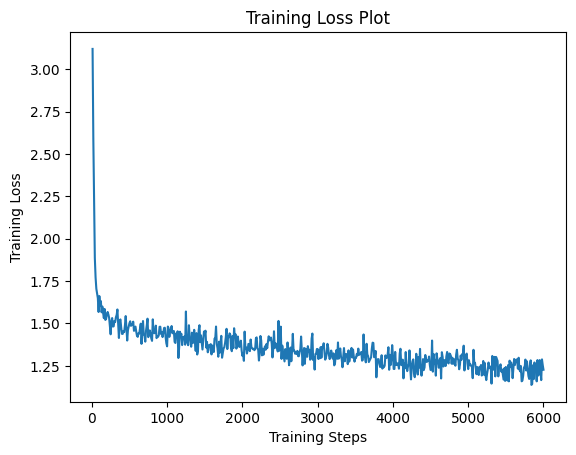

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

training_logs = trainer.state.log_history

loss = []
step = []
for i, log in enumerate(training_logs):
  if (i + 1) % len(training_logs) == 0:
    break
  else:
    loss.append(log['loss'])
    step.append(log['step'])

# ÏÜêÏã§Ìï®Ïàò Í∑∏ÎûòÌîÑ
plt.plot(step, loss)
plt.xlabel("Training Steps")
plt.ylabel("Training Loss")
plt.title("Training Loss Plot")
plt.show()

### Upload the trained model Huggingface

- HuggingFace model-repositoryÏóê Ï†ÄÏû•

In [20]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) Y
Token is valid (permission: write).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' creden

In [21]:
model.push_to_hub('kyeong6/koalpaca-polyglot-5_8b-food-recys')

adapter_model.safetensors:   0%|          | 0.00/14.7M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/kyeong6/koalpaca-polyglot-5_8b-food-recys/commit/6b59b7fad27efc0a55d4ad89a30cfbd1d503f5b6', commit_message='Upload model', commit_description='', oid='6b59b7fad27efc0a55d4ad89a30cfbd1d503f5b6', pr_url=None, pr_revision=None, pr_num=None)